In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
car_data = pd.read_csv('datasets/car-data.csv')
print("Car data: \n {}".format(car_data.head()))
print("Car data description: \n {}".format(car_data.describe(include='all')))

Car data: 
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Car data description: 
        Car_Name         Year  Selling_Price  Present_Price     Kms_Driven  \
count       301   301.000000     301.000000     301.000000     301.000000   
unique       98          NaN            NaN            NaN            NaN   
top        city          NaN            NaN            NaN            NaN   
freq   

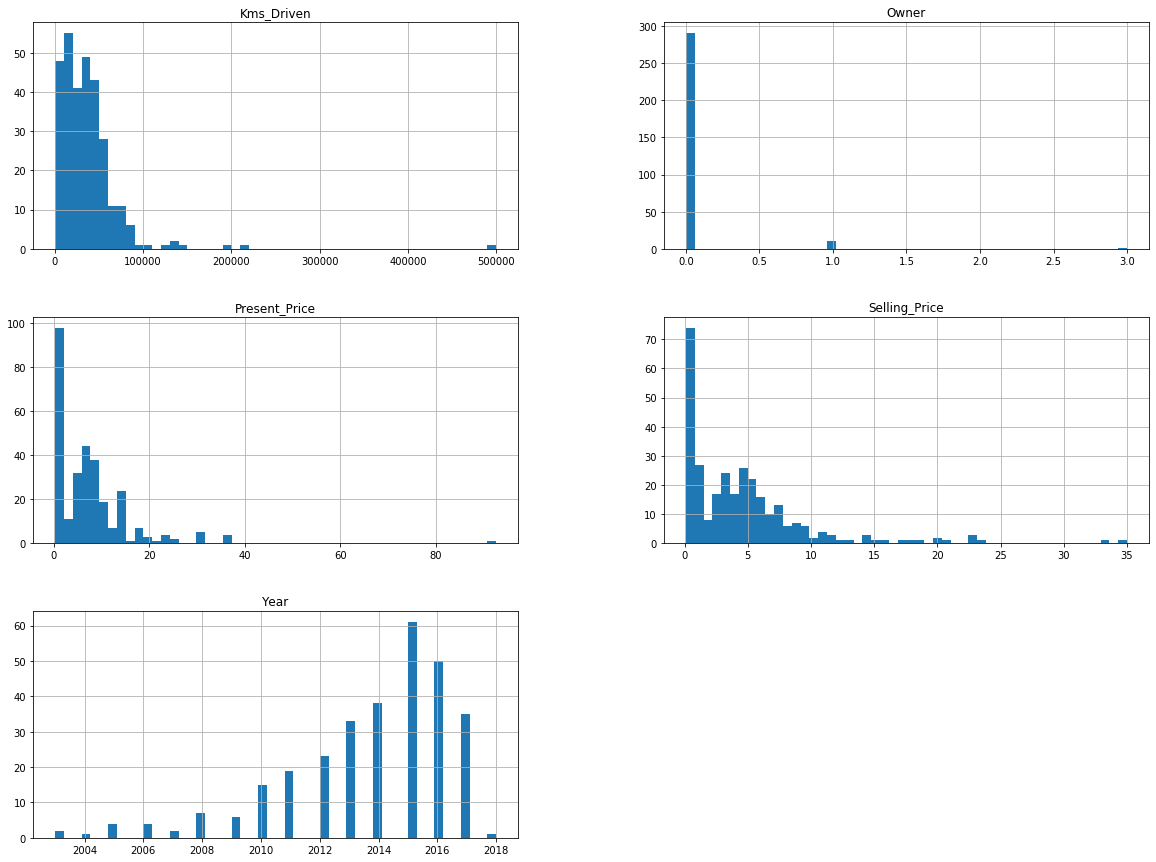

In [22]:
%matplotlib inline
car_data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226DFB725F8>,
      dtype=object)

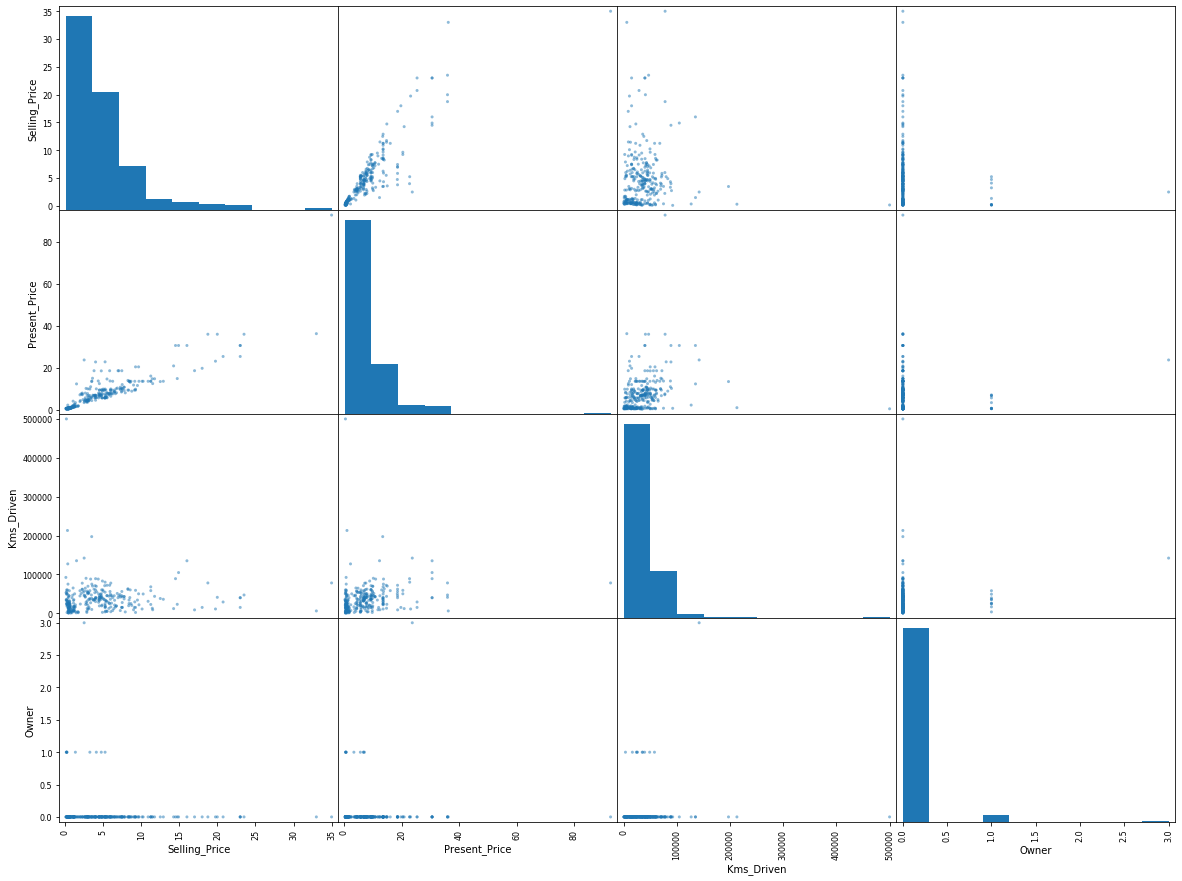

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["Selling_Price", 
              "Present_Price", 
              "Kms_Driven",
              "Owner"]
scatter_matrix(car_data[attributes], figsize=(20, 15))

In [24]:
#checking for missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [25]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car_data['Seller_Type'] = le.fit_transform(car_data['Seller_Type'])
car_data['Transmission'] = le.fit_transform(car_data['Transmission'])

fuel_type_one_hot_encoding = pd.get_dummies(car_data['Fuel_Type'], prefix='FT', drop_first=True)
car_data = pd.concat([car_data, fuel_type_one_hot_encoding],axis=1)

car_data['Num_Years'] = 2019 - car_data['Year']

car_data.drop(['Fuel_Type'], axis=1, inplace=True)
car_data.drop(['Car_Name'], axis=1, inplace=True)
car_data.drop(['Year'], axis=1, inplace=True)

print("Car data after preprocessing: \n {}".format(car_data.head()))

Car data after preprocessing: 
    Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  Owner  \
0           3.35           5.59       27000            0             1      0   
1           4.75           9.54       43000            0             1      0   
2           7.25           9.85        6900            0             1      0   
3           2.85           4.15        5200            0             1      0   
4           4.60           6.87       42450            0             1      0   

   FT_Diesel  FT_Petrol  Num_Years  
0          0          1          5  
1          1          0          6  
2          0          1          2  
3          0          1          8  
4          1          0          5  


In [26]:
# create test set 
from sklearn.model_selection import train_test_split
car_data_train, car_data_test = train_test_split(car_data,test_size=0.1,random_state=1)

print("Car data after splitting\n")
print("Training data: \n {}".format(car_data_train.info()))
print("Test data: \n {}".format(car_data_test.info()))

Car data after splitting

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 197 to 37
Data columns (total 9 columns):
Selling_Price    270 non-null float64
Present_Price    270 non-null float64
Kms_Driven       270 non-null int64
Seller_Type      270 non-null int32
Transmission     270 non-null int32
Owner            270 non-null int64
FT_Diesel        270 non-null uint8
FT_Petrol        270 non-null uint8
Num_Years        270 non-null int64
dtypes: float64(2), int32(2), int64(3), uint8(2)
memory usage: 15.3 KB
Training data: 
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 285 to 182
Data columns (total 9 columns):
Selling_Price    31 non-null float64
Present_Price    31 non-null float64
Kms_Driven       31 non-null int64
Seller_Type      31 non-null int32
Transmission     31 non-null int32
Owner            31 non-null int64
FT_Diesel        31 non-null uint8
FT_Petrol        31 non-null uint8
Num_Years        31 non-null int64
dtypes: float64(2), int3

In [28]:
# separating features and target labels
X_train = car_data_train.iloc[:, 1:].values
y_train = car_data_train.iloc[:, 0].values

X_test = car_data_test.iloc[:, 1:].values
y_test = car_data_test.iloc[:, 0].values

print("Training features: Shape -> {} \n {}".format(X_train.shape, X_train[:5]))
print("Training Labels: Shape -> {} \n {}".format(y_train.shape, y_train[:5]))
print("Test features: Shape -> {} \n {}".format(X_test.shape, X_test[:5]))
print("Test Labels: Shape -> {} \n {}".format(y_test.shape, y_test[:5]))

Training features: Shape -> (270, 8) 
 [[5.100e-01 3.300e+04 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  9.000e+00]
 [5.700e+00 2.820e+04 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  4.000e+00]
 [3.596e+01 4.100e+04 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  5.000e+00]
 [3.061e+01 4.000e+04 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  4.000e+00]
 [6.760e+00 4.000e+04 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  5.000e+00]]
Training Labels: Shape -> (270,) 
 [ 0.16  4.4  19.99 23.    4.75]
Test features: Shape -> (31, 8) 
 [[8.5000e+00 1.5059e+04 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 3.0000e+00]
 [4.6000e+00 3.0000e+04 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 6.0000e+00]
 [8.2600e-01 6.0000e+03 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 8.0000e+00]
 [4.4300e+00 1.5000e+04 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 3.0000e+00]
 [1.5000e+00 1.5000e+04 1.0000e+00 1.0000e+00 0.0000e+00 0.000

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_regression_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])
scores_lin = cross_val_score(
    linear_regression_pipeline,
    X_train,
    y_train,
    cv=6,
    scoring='neg_mean_squared_error'
)
print("Mean squared error: {}\n".format(scores_lin))

Mean squared error: [ -2.5246767   -1.58423409  -2.95165467  -4.07491285  -2.3297491
 -11.4158746 ]



In [44]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

sgd_regression_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ("sgd_reg", SGDRegressor(max_iter=500, verbose=1, random_state=1))
])
param_grid = {
    'sgd_reg__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    'sgd_reg__eta0': [0.001, 0.005, 0.01, 0.05, 0.1]
}
grid_search_clf = GridSearchCV(sgd_regression_pipeline, param_grid, n_jobs=-1, cv=6, scoring='neg_mean_squared_error')
grid_search_clf.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid_search_clf.best_score_)
print(grid_search_clf.best_params_)
print('\nBest estimator: {}\n'.format(grid_search_clf.best_estimator_))

-- Epoch 1
Norm: 0.57, NNZs: 8, Bias: 0.400794, T: 270, Avg. loss: 22.170791
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 8, Bias: 0.658029, T: 540, Avg. loss: 18.231443
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 8, Bias: 0.871537, T: 810, Avg. loss: 15.770059
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.36, NNZs: 8, Bias: 1.057137, T: 1080, Avg. loss: 13.956069
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.53, NNZs: 8, Bias: 1.223040, T: 1350, Avg. loss: 12.541052
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.68, NNZs: 8, Bias: 1.374116, T: 1620, Avg. loss: 11.393676
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.81, NNZs: 8, Bias: 1.513349, T: 1890, Avg. loss: 10.440662
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 1.92, NNZs: 8, Bias: 1.642092, T: 2160, Avg. loss: 9.634569
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 2.02, NNZs: 8, Bias: 1.761986, T: 2430, Avg. loss: 8.941740
Total training time: 0.

Total training time: 0.18 seconds.
-- Epoch 91
Norm: 3.60, NNZs: 8, Bias: 4.424733, T: 24570, Avg. loss: 1.778802
Total training time: 0.18 seconds.
-- Epoch 92
Norm: 3.61, NNZs: 8, Bias: 4.432182, T: 24840, Avg. loss: 1.772905
Total training time: 0.19 seconds.
-- Epoch 93
Norm: 3.61, NNZs: 8, Bias: 4.439424, T: 25110, Avg. loss: 1.767006
Total training time: 0.19 seconds.
-- Epoch 94
Norm: 3.62, NNZs: 8, Bias: 4.446505, T: 25380, Avg. loss: 1.761415
Total training time: 0.19 seconds.
-- Epoch 95
Norm: 3.62, NNZs: 8, Bias: 4.453408, T: 25650, Avg. loss: 1.756090
Total training time: 0.19 seconds.
-- Epoch 96
Norm: 3.63, NNZs: 8, Bias: 4.460174, T: 25920, Avg. loss: 1.750797
Total training time: 0.19 seconds.
-- Epoch 97
Norm: 3.63, NNZs: 8, Bias: 4.466751, T: 26190, Avg. loss: 1.745616
Total training time: 0.20 seconds.
-- Epoch 98
Norm: 3.64, NNZs: 8, Bias: 4.473166, T: 26460, Avg. loss: 1.740812
Total training time: 0.20 seconds.
-- Epoch 99
Norm: 3.64, NNZs: 8, Bias: 4.479449, T: 2

In [47]:
# creating final model
sgd_reg_final_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ("sgd_reg", SGDRegressor(max_iter=500, 
                             verbose=1, 
                             random_state=1, 
                             alpha=0.01,
                             eta0=0.001))
])
sgd_reg_final_pipeline.fit(X_train, y_train)
predictions = sgd_reg_final_pipeline.predict(X_test)
print("Predictions: \n {}".format(predictions))
from sklearn.metrics import mean_squared_error

print("Mean squared error: {} \n".format(mean_squared_error(y_test, predictions)))

-- Epoch 1
Norm: 0.57, NNZs: 8, Bias: 0.400794, T: 270, Avg. loss: 22.170791
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 8, Bias: 0.658029, T: 540, Avg. loss: 18.231443
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 8, Bias: 0.871537, T: 810, Avg. loss: 15.770059
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.36, NNZs: 8, Bias: 1.057137, T: 1080, Avg. loss: 13.956069
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.53, NNZs: 8, Bias: 1.223040, T: 1350, Avg. loss: 12.541052
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.68, NNZs: 8, Bias: 1.374116, T: 1620, Avg. loss: 11.393676
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.81, NNZs: 8, Bias: 1.513349, T: 1890, Avg. loss: 10.440662
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.92, NNZs: 8, Bias: 1.642092, T: 2160, Avg. loss: 9.634569
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.02, NNZs: 8, Bias: 1.761986, T: 2430, Avg. loss: 8.941740
Total training time: 0.

Norm: 3.70, NNZs: 8, Bias: 4.544397, T: 29970, Avg. loss: 1.688792
Total training time: 0.18 seconds.
-- Epoch 112
Norm: 3.70, NNZs: 8, Bias: 4.549058, T: 30240, Avg. loss: 1.685503
Total training time: 0.18 seconds.
-- Epoch 113
Norm: 3.70, NNZs: 8, Bias: 4.553612, T: 30510, Avg. loss: 1.682391
Total training time: 0.18 seconds.
-- Epoch 114
Norm: 3.71, NNZs: 8, Bias: 4.558044, T: 30780, Avg. loss: 1.679243
Total training time: 0.18 seconds.
-- Epoch 115
Norm: 3.71, NNZs: 8, Bias: 4.562382, T: 31050, Avg. loss: 1.676283
Total training time: 0.18 seconds.
-- Epoch 116
Norm: 3.72, NNZs: 8, Bias: 4.566611, T: 31320, Avg. loss: 1.673327
Total training time: 0.19 seconds.
-- Epoch 117
Norm: 3.72, NNZs: 8, Bias: 4.570763, T: 31590, Avg. loss: 1.670632
Total training time: 0.19 seconds.
-- Epoch 118
Norm: 3.72, NNZs: 8, Bias: 4.574833, T: 31860, Avg. loss: 1.667794
Total training time: 0.19 seconds.
-- Epoch 119
Norm: 3.73, NNZs: 8, Bias: 4.578795, T: 32130, Avg. loss: 1.665116
Total trainin